# Final Report

## Breast Cancer Classifier

In this project we will be using our random forest classifier to predict the assessment given to patients based on their mammography information. 

We will be [this](https://www.kaggle.com/datasets/haithemhermessi/breast-cancer-screening-data-set) dataset from kagge to carry out this project.


## Loading Data

First, let us load in the required classes for this project to work before we continue onward

In [71]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.classifier_utils
importlib.reload(mysklearn.classifier_utils)
import mysklearn.classifier_utils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.classifiers
importlib.reload(mysklearn.classifiers)
from mysklearn.classifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.evaluators
importlib.reload(mysklearn.evaluators)
import mysklearn.evaluators as myevaluation
import matplotlib as plt

## Intro to attributes

In our dataset we have the following attributes:

1. Radiaologist_Assesment
    - Radiologist's assessment based on the BI-RADS scale
1. Age_At_The_Time_Of_Mammography
    - Patients Age
1. IsBinaryIndicatorOfCancer_Diagnosis	
    - Binary indicator of cancer diagnosis within one year of screening mammogram (false= No cancer diagnosis, true= Cancer diagnosis)
1. ComparisonMammogramFrom_Mammography	
    - Comparison mammogram from prior mammography examination available
1. PatientsBIRADSBreastDensity
    - Patient's BI-RADS breast density as recorded at time of mammogram
1. FamilyHistoryOfBreastCancer
    - Family history of breast cancer in a first degree relative
1. Current use of hormone therapy at time of mammogram
    - Current use of hormone therapy at time of mammogram
1. Binary_Indicator
    - Binary indicator of whether the woman had ever received a prior mammogram
1. HistoryOfBreast_Biopsy	
    - Prior history of breast biopsy
1. IsFilmOrDigitalMammogram	
    - Film or digital mammogram (true=Digital mammogram, false=Film mammogram)


## Data Preparation
We start by cleaning the data. Upon manually looking at the data, we decided to remove the attributes: 
- Cancer_Type
- BMI
- Patient Study ID

This was done due to irrelavence, and a great amount of missing data within these attributes.

We also change age from a continuous attribute, to a catagorical attribute as our classifiers work far better with catagorical attributes.

## Loading The Data

We will be loading the data into our MyPyTable and do the preliminary cleaning

In [47]:
data = MyPyTable()
data.load_from_file("input_data/breastcancer.csv")
data.rem_column("Cancer_Type")
data.rem_column("Body_Mass_Index")
data.rem_column("Patients_Study_ID")

for row in data.data:
    row[0] = str(int(row[0] - (row[0] % 10))) + "'s" # Make continuous into catagorical

data.save_to_file("output_data/breast_cancer_clean.csv")
y = data.get_column("Radiologists_Assessment")
y = myutils.y_clean(y)
data.rem_column("Radiologists_Assessment")
X = data.data

## Data Distribution
Now that we have our Data loaded, let us take a look at the distribution of the data loaded

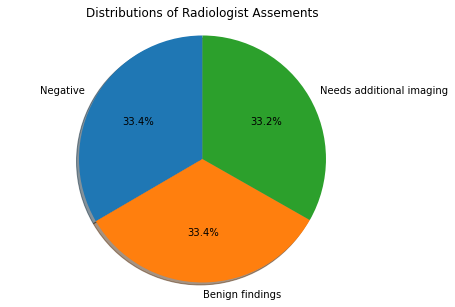

fig 1 Distribution of Radiologist Assesments


In [48]:

labels, sizes = myutils.return_counts(y)
myutils.piecharty(labels, sizes, "Distributions of Radiologist Assements")
print("fig 1 Distribution of Radiologist Assesments")



As expected, it will be an even split from our cleaned data. so now let us take a look at the distribution of information between each of the sections

# Bar Charts

Below Are BarCharts of our Data

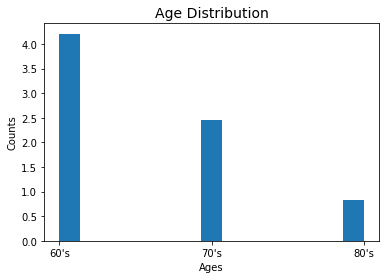

fig 2.1 Combined Age Distribution


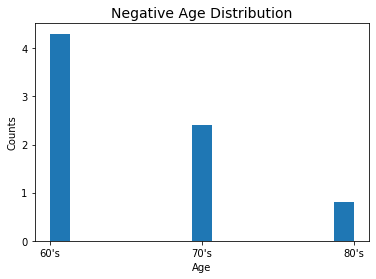

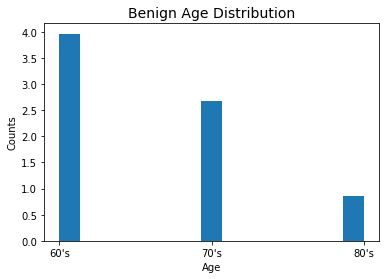

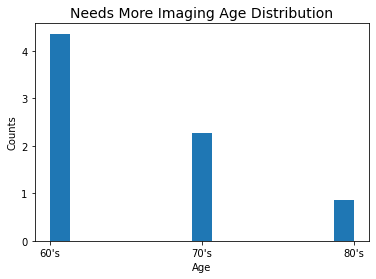

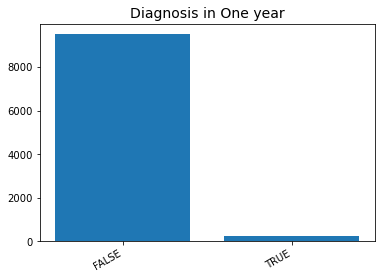

fig 2.2 Combined Diagnosis Results One Year Later


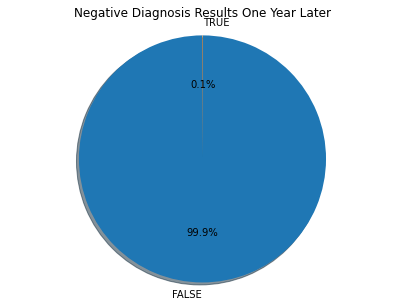

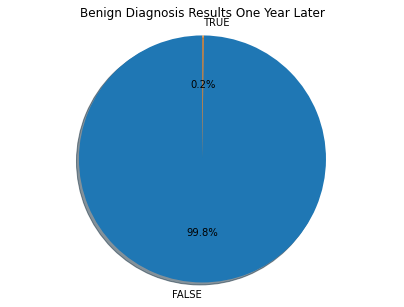

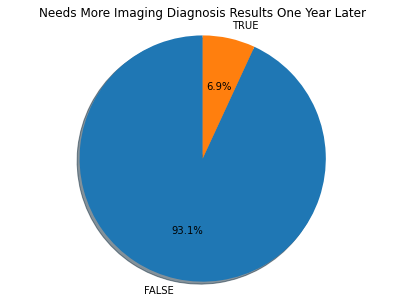

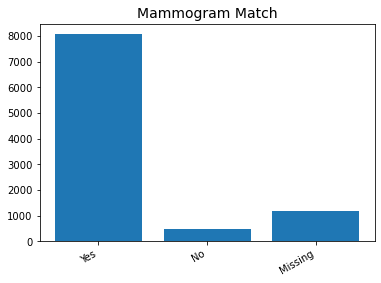

fig 2.3 Combined Mammogram Matches Previous Mammograms


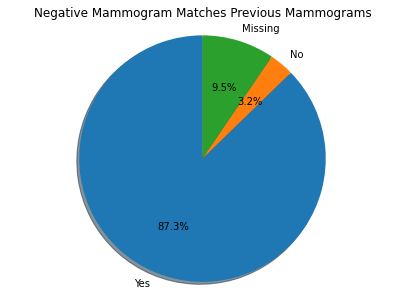

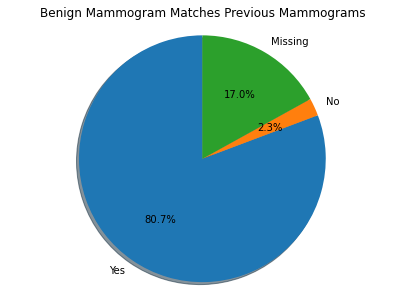

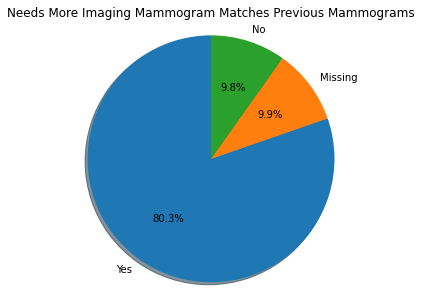

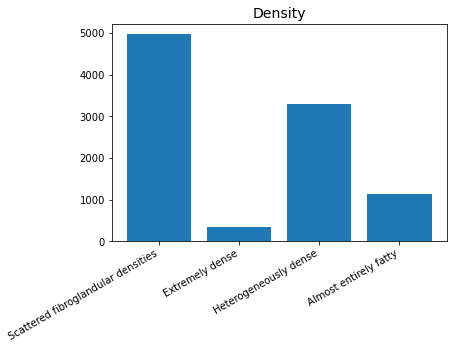

fig 2.4 Combined Density Distributions of Mammograms


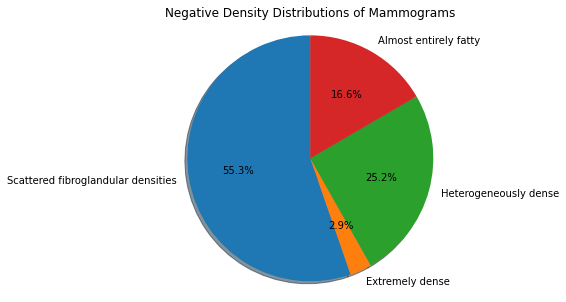

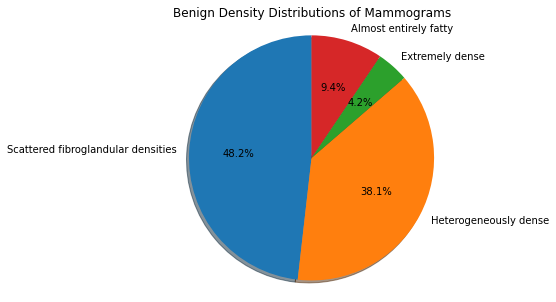

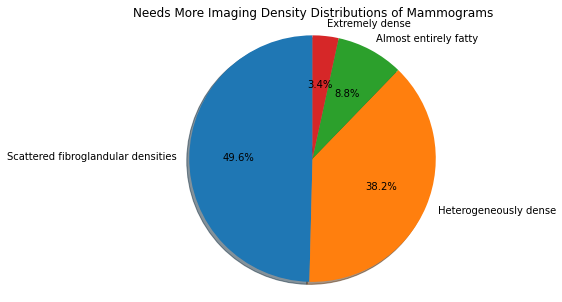

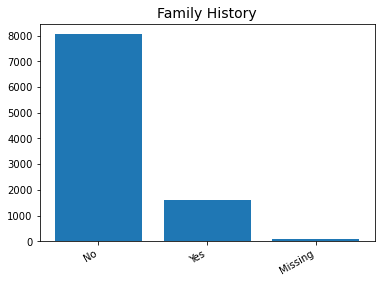

fig 2.5 Combined Distribution of Family History of Cancer


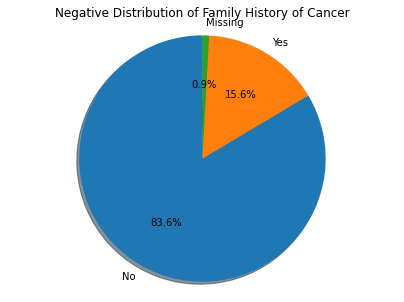

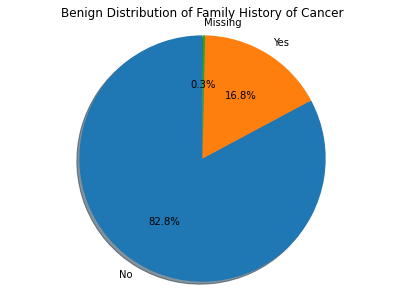

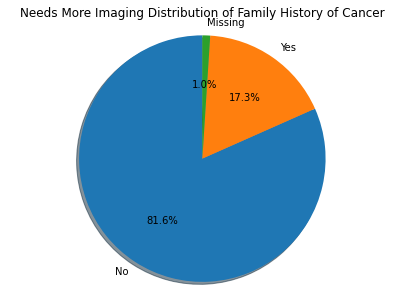

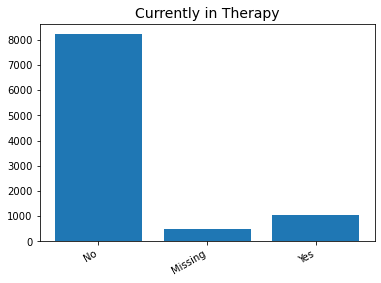

fig 2.6 Combined Distribution of Patients Currently in Therapy


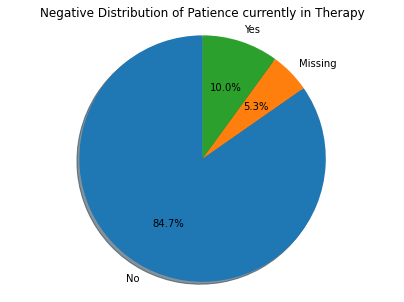

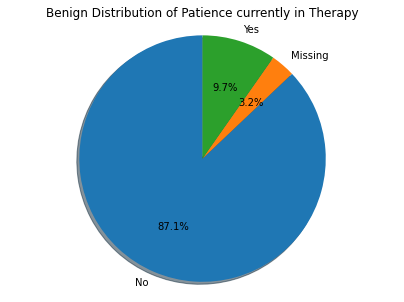

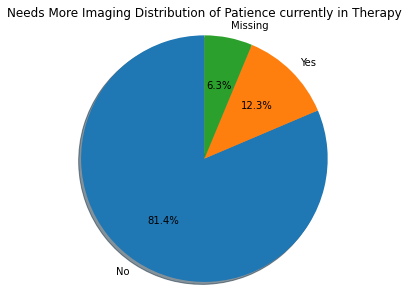

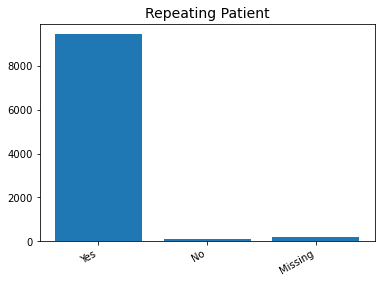

fig 2.7 Combined Distribution of Patients who had prior Mammograms


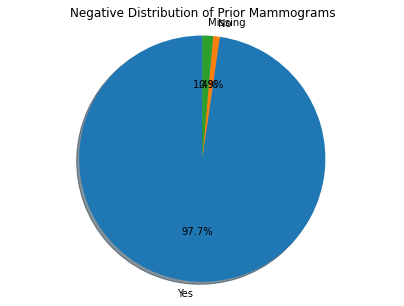

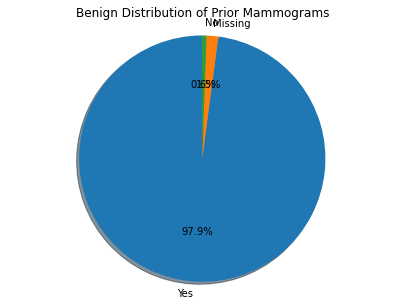

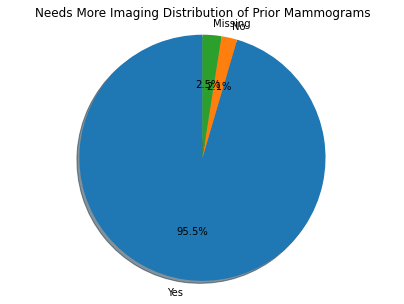

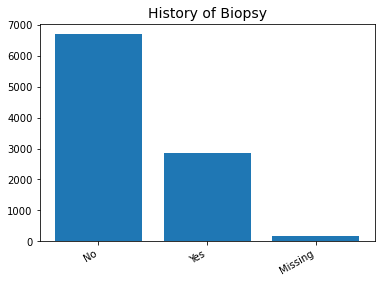

fig 2.8 Combined Distribution of History of Biopsy


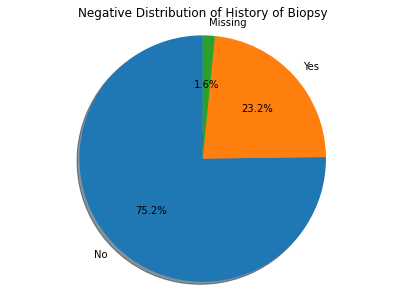

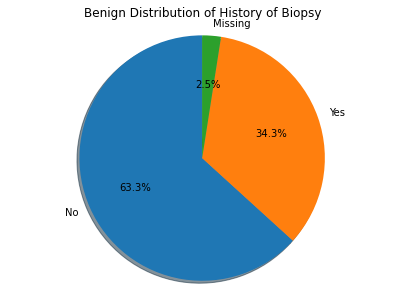

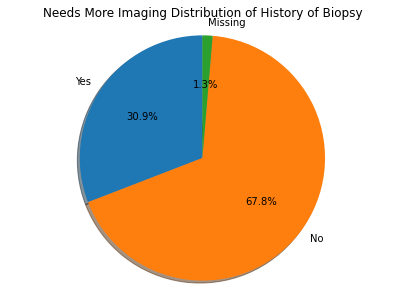

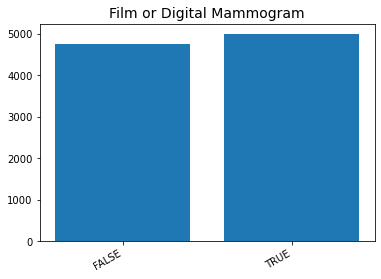

fig 2.9 Combined Distribution of Physical or Digital Mammograms


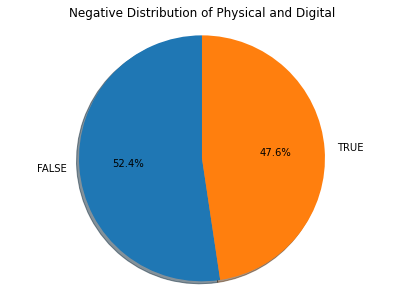

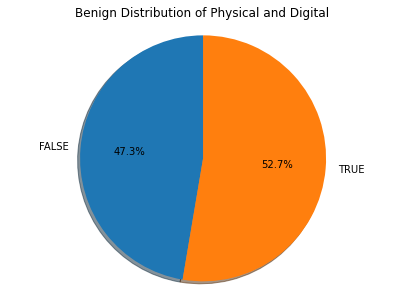

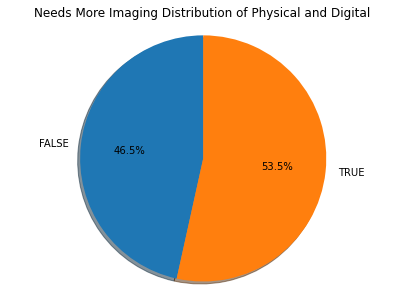

In [49]:
ages = data.get_column("Age_At_The_Time_Of_Mammography")
myutils.histogramy(ages, "Age Distribution", "Ages")
print("fig 2.1 Combined Age Distribution")

myutils.histogram_splits(ages, y, "Age Distribution", "Age")


binary_indicator = data.get_column("Is_Binary_Indicator_Of_Cancer_Diagnosis")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Diagnosis in One year")
print("fig 2.2 Combined Diagnosis Results One Year Later")
myutils.splity(binary_indicator, y, "Diagnosis Results One Year Later")


binary_indicator = data.get_column("Comparison_Mammogram_From_Mammography")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Mammogram Match")
print("fig 2.3 Combined Mammogram Matches Previous Mammograms")
myutils.splity(binary_indicator, y, "Mammogram Matches Previous Mammograms")

binary_indicator = data.get_column("Patients_BI_RADS_Breast_Density")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Density")
print("fig 2.4 Combined Density Distributions of Mammograms")
myutils.splity(binary_indicator, y, "Density Distributions of Mammograms")

binary_indicator = data.get_column("Family_History_Of_Breast_Cancer")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Family History")
print("fig 2.5 Combined Distribution of Family History of Cancer")
myutils.splity(binary_indicator, y, "Distribution of Family History of Cancer")

binary_indicator = data.get_column("Current_Use_Of_Hormone_Therapy")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Currently in Therapy")
print("fig 2.6 Combined Distribution of Patients Currently in Therapy")
myutils.splity(binary_indicator, y, "Distribution of Patience currently in Therapy")

binary_indicator = data.get_column("Binary_Indicator")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Repeating Patient")
print("fig 2.7 Combined Distribution of Patients who had prior Mammograms")
myutils.splity(binary_indicator, y, "Distribution of Prior Mammograms")

binary_indicator = data.get_column("History_Of_Breast_Biopsy")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"History of Biopsy")
print("fig 2.8 Combined Distribution of History of Biopsy")
myutils.splity(binary_indicator, y, "Distribution of History of Biopsy")

binary_indicator = data.get_column("Is_Film_Or_Digital_Mammogram")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Film or Digital Mammogram")
print("fig 2.9 Combined Distribution of Physical or Digital Mammograms")
myutils.splity(binary_indicator, y, "Distribution of Physical and Digital")


## Examination

Of note Is the Diagnosis Results one year later and Patients currently in theraphy.  
Needs more imaging had a large number of people positive in those groups compared to others

Otherwise all the other categories are close to the same, which sadly is one of the reasons why cancer is so hard to single out.

# Fitting the Data to Our Classifiers

With our clean data we now are going to fit it to three classifiers, Naive Bayes, K Nearest Neighbor, Decision Tree, and Random Forest. To split our data into an approximate 60/30 split we use a new bootstrap sample stratisfied method in our evaluators file that is based havily off of the bootstrap sampler used by the random forest classifier. Afterwards we fit the data and run our predictions.

## Our Classifiers

For the most part our functions were not changed from how they were made for the assignments. However, since Knn was only set up for continuous data, we needed to fix it to work for catagoricals, this was done by checking for matches instead of distance. The only classifier not made for class was the random forest classifier. This was was made very simply y repurposing a majority of the decision tree functions as random forest is just multiple decision trees. Thus we made a repurposed tdidt algorithm for it making sure to subset sample for our attribute selection. 

In [72]:
nvb_clf = MyNaiveBayesClassifier()
knn_clf = MyKNeighborsClassifier(3)
dct_clf = MyDecisionTreeClassifier()
rnf_clf = MyRandomForestClassifier(5, 3, 5)

X_train, X_test, y_train, y_test = myevaluation.bootstrap_sample_stratified(X, y)

In [73]:
nvb_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
dct_clf.fit(X_train, y_train)
rnf_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test, True)
nvb_pred = nvb_clf.predict(X_test)
dct_pred = dct_clf.predict(X_test)
rnf_pred = rnf_clf.predict(X_test)


## Predictions
Sadly from our predictions we don't seem to get very high accuracy. All our values float around the 40%-45% range. Its hard to tell why our accuracy is so low, but if I had to guess I would assume that our data has a large amount of contradictory findings, that is instances with very similiar attributes, but different class values. We see this in our EDA with the charts looking similar regardless of the class attribute

In [74]:
knn_acc = myevaluation.accuracy_score(y_test, knn_pred)
nvb_acc = myevaluation.accuracy_score(y_test, nvb_pred)
dct_acc = myevaluation.accuracy_score(y_test, dct_pred)
rnf_acc = myevaluation.accuracy_score(y_test, rnf_pred)
print("===========================================")
print("STEP 1: Predictive Accuracy")
print("===========================================")
print("Stratified Bootstrap Cross Validation")
print("k Nearest Neighbors Classifier: accuracy = {}, error rate = {}".format(round(knn_acc, 2), round(1-knn_acc, 2)))
print("Naive Bayes Classifier: accuracy = {}, error rate = {}".format(round(nvb_acc, 2), round(1-nvb_acc, 2)))
print("Decision Tree Classifier: accuracy = {}, error rate = {}".format(round(dct_acc, 2), round(1-dct_acc, 2)))
print("Random Forest Classifier: accuracy = {}, error rate = {}".format(round(rnf_acc, 2), round(1-rnf_acc, 2)))

STEP 1: Predictive Accuracy
Stratified Bootstrap Cross Validation
k Nearest Neighbors Classifier: accuracy = 0.37, error rate = 0.63
Naive Bayes Classifier: accuracy = 0.46, error rate = 0.54
Decision Tree Classifier: accuracy = 0.44, error rate = 0.56
Random Forest Classifier: accuracy = 0.43, error rate = 0.57


## Precision, Recall, and F1

Here test the Precision, Recall, and F1 scores of our predictions and we ran it using each class value as the positive label once. We don't see a huge ammount of surprising information here, but we do learn that our dataset is better for predicting for "Negative" and "Needs additional imaging" than it is for "Benign findings". We also see that knn is actually very precise, but only for "Needs additional imaging" and we will see why with the matrices.

In [85]:
knn_pre = myevaluation.binary_precision_score(y_test, knn_pred, pos_label="Negative")
nvb_pre = myevaluation.binary_precision_score(y_test, nvb_pred, pos_label="Negative")
dct_pre = myevaluation.binary_precision_score(y_test, dct_pred, pos_label="Negative")
rnf_pre = myevaluation.binary_precision_score(y_test, rnf_pred, pos_label="Negative")
knn_rec = myevaluation.binary_recall_score(y_test, knn_pred, pos_label="Negative")
nvb_rec = myevaluation.binary_recall_score(y_test, nvb_pred, pos_label="Negative")
dct_rec = myevaluation.binary_recall_score(y_test, dct_pred, pos_label="Negative")
rnf_rec = myevaluation.binary_recall_score(y_test, rnf_pred, pos_label="Negative")
knn_f1 = myevaluation.binary_f1_score(y_test, knn_pred, pos_label="Negative")
nvb_f1 = myevaluation.binary_f1_score(y_test, nvb_pred, pos_label="Negative")
dct_f1 = myevaluation.binary_f1_score(y_test, dct_pred, pos_label="Negative")
rnf_f1 = myevaluation.binary_f1_score(y_test, rnf_pred, pos_label="Negative")
print("===========================================")
print("STEP 2: Predictive Accuracy")
print("===========================================")
print("Stratified Bootstrap Cross Validation")
print("k Nearest Neighbors Classifier: precision = {}, recall = {}, f1 = {}".format(round(knn_pre, 2), round(knn_rec, 2), round(knn_f1, 2)))
print("Naive Bayes Classifier: precision = {}, recall = {}, f1 = {}".format(round(nvb_pre, 2), round(nvb_rec, 2), round(nvb_f1, 2)))
print("Decision Tree Classifier: precision = {}, recall = {}, f1 = {}".format(round(dct_pre, 2), round(dct_rec, 2), round(dct_f1, 2)))
print("Random Forest Classifier: precision = {}, recall = {}, f1 = {}".format(round(rnf_pre, 2), round(rnf_rec, 2), round(rnf_f1, 2)))

STEP 2: Predictive Accuracy
Stratified Bootstrap Cross Validation
k Nearest Neighbors Classifier: precision = 0.35, recall = 0.95, f1 = 0.51
Naive Bayes Classifier: precision = 0.45, recall = 0.51, f1 = 0.48
Decision Tree Classifier: precision = 0.42, recall = 0.6, f1 = 0.5
Random Forest Classifier: precision = 0.42, recall = 0.53, f1 = 0.47


In [79]:
knn_pre = myevaluation.binary_precision_score(y_test, knn_pred, pos_label="Benign findings")
nvb_pre = myevaluation.binary_precision_score(y_test, nvb_pred, pos_label="Benign findings")
dct_pre = myevaluation.binary_precision_score(y_test, dct_pred, pos_label="Benign findings")
rnf_pre = myevaluation.binary_precision_score(y_test, rnf_pred, pos_label="Benign findings")
knn_rec = myevaluation.binary_recall_score(y_test, knn_pred, pos_label="Benign findings")
nvb_rec = myevaluation.binary_recall_score(y_test, nvb_pred, pos_label="Benign findings")
dct_rec = myevaluation.binary_recall_score(y_test, dct_pred, pos_label="Benign findings")
rnf_rec = myevaluation.binary_recall_score(y_test, rnf_pred, pos_label="Benign findings")
knn_f1 = myevaluation.binary_f1_score(y_test, knn_pred, pos_label="Benign findings")
nvb_f1 = myevaluation.binary_f1_score(y_test, nvb_pred, pos_label="Benign findings")
dct_f1 = myevaluation.binary_f1_score(y_test, dct_pred, pos_label="Benign findings")
rnf_f1 = myevaluation.binary_f1_score(y_test, rnf_pred, pos_label="Benign findings")
print("===========================================")
print("STEP 2: Predictive Accuracy")
print("===========================================")
print("Stratified Bootstrap Cross Validation")
print("k Nearest Neighbors Classifier: precision = {}, recall = {}, f1 = {}".format(round(knn_pre, 2), round(knn_rec, 2), round(knn_f1, 2)))
print("Naive Bayes Classifier: precision = {}, recall = {}, f1 = {}".format(round(nvb_pre, 2), round(nvb_rec, 2), round(nvb_f1, 2)))
print("Decision Tree Classifier: precision = {}, recall = {}, f1 = {}".format(round(dct_pre, 2), round(dct_rec, 2), round(dct_f1, 2)))
print("Random Forest Classifier: precision = {}, recall = {}, f1 = {}".format(round(rnf_pre, 2), round(rnf_rec, 2), round(rnf_f1, 2)))

STEP 2: Predictive Accuracy
Stratified Bootstrap Cross Validation
k Nearest Neighbors Classifier: precision = 0.39, recall = 0.06, f1 = 0.11
Naive Bayes Classifier: precision = 0.43, recall = 0.6, f1 = 0.5
Decision Tree Classifier: precision = 0.43, recall = 0.48, f1 = 0.45
Random Forest Classifier: precision = 0.42, recall = 0.5, f1 = 0.46


In [80]:
knn_pre = myevaluation.binary_precision_score(y_test, knn_pred, pos_label="Needs additional imaging")
nvb_pre = myevaluation.binary_precision_score(y_test, nvb_pred, pos_label="Needs additional imaging")
dct_pre = myevaluation.binary_precision_score(y_test, dct_pred, pos_label="Needs additional imaging")
rnf_pre = myevaluation.binary_precision_score(y_test, rnf_pred, pos_label="Needs additional imaging")
knn_rec = myevaluation.binary_recall_score(y_test, knn_pred, pos_label="Needs additional imaging")
nvb_rec = myevaluation.binary_recall_score(y_test, nvb_pred, pos_label="Needs additional imaging")
dct_rec = myevaluation.binary_recall_score(y_test, dct_pred, pos_label="Needs additional imaging")
rnf_rec = myevaluation.binary_recall_score(y_test, rnf_pred, pos_label="Needs additional imaging")
knn_f1 = myevaluation.binary_f1_score(y_test, knn_pred, pos_label="Needs additional imaging")
nvb_f1 = myevaluation.binary_f1_score(y_test, nvb_pred, pos_label="Needs additional imaging")
dct_f1 = myevaluation.binary_f1_score(y_test, dct_pred, pos_label="Needs additional imaging")
rnf_f1 = myevaluation.binary_f1_score(y_test, rnf_pred, pos_label="Needs additional imaging")
print("===========================================")
print("STEP 2: Predictive Accuracy")
print("===========================================")
print("Stratified Bootstrap Cross Validation")
print("k Nearest Neighbors Classifier: precision = {}, recall = {}, f1 = {}".format(round(knn_pre, 2), round(knn_rec, 2), round(knn_f1, 2)))
print("Naive Bayes Classifier: precision = {}, recall = {}, f1 = {}".format(round(nvb_pre, 2), round(nvb_rec, 2), round(nvb_f1, 2)))
print("Decision Tree Classifier: precision = {}, recall = {}, f1 = {}".format(round(dct_pre, 2), round(dct_rec, 2), round(dct_f1, 2)))
print("Random Forest Classifier: precision = {}, recall = {}, f1 = {}".format(round(rnf_pre, 2), round(rnf_rec, 2), round(rnf_f1, 2)))

STEP 2: Predictive Accuracy
Stratified Bootstrap Cross Validation
k Nearest Neighbors Classifier: precision = 0.75, recall = 0.07, f1 = 0.13
Naive Bayes Classifier: precision = 0.57, recall = 0.26, f1 = 0.36
Decision Tree Classifier: precision = 0.52, recall = 0.24, f1 = 0.33
Random Forest Classifier: precision = 0.47, recall = 0.26, f1 = 0.34


## Confusion Matrices
What we see here confirms most of what we've seen from our previous tests. The True positives are not very much larger than our false positives and thus our accuracy is not very high. We do see here however why precision was so high for knn's "Needs additional imaging". The classifier does not choose this class very often at all, but when it does it is very confident.

In [84]:
from tabulate import tabulate 

knn_matrix = myevaluation.confusion_matrix(y_test, knn_pred, ["Negative", "Benign findings", "Needs additional imaging"])
nvb_matrix = myevaluation.confusion_matrix(y_test, nvb_pred, ["Negative", "Benign findings", "Needs additional imaging"])
dct_matrix = myevaluation.confusion_matrix(y_test, dct_pred, ["Negative", "Benign findings", "Needs additional imaging"])
rnf_matrix = myevaluation.confusion_matrix(y_test, rnf_pred, ["Negative", "Benign findings", "Needs additional imaging"])

header = ["","Negative", "Benign findings", "Needs additional imaging", "Total"]

for ind in range(3): # Hard coded for three class attributes
    knn_matrix[ind].append(sum(knn_matrix[ind]))
    knn_matrix[ind].insert(0, header[ind + 1])
    nvb_matrix[ind].append(sum(nvb_matrix[ind]))
    nvb_matrix[ind].insert(0, header[ind + 1])
    dct_matrix[ind].append(sum(dct_matrix[ind]))
    dct_matrix[ind].insert(0, header[ind + 1])
    rnf_matrix[ind].append(sum(rnf_matrix[ind]))
    rnf_matrix[ind].insert(0, header[ind + 1])

print("===========================================")
print("STEP 4: Confusion Matrices")
print("===========================================")
print("k Nearest Neighbors Classifier (Stratified Bootstrap Cross Validation):")

print(tabulate(knn_matrix, header))

print("Naive Bayes Classifier (Stratified Bootstrap Cross Validation):")

print(tabulate(nvb_matrix, header))

print("Decision Tree Classifier (Stratified Bootstrap Cross Validation):")

print(tabulate(dct_matrix, header))

print("Random Forest Classifier (Stratified Bootstrap Cross Validation):")

print(tabulate(rnf_matrix, header))

STEP 4: Confusion Matrices
k Nearest Neighbors Classifier (Stratified Bootstrap Cross Validation):
                            Negative    Benign findings    Needs additional imaging    Total
------------------------  ----------  -----------------  --------------------------  -------
Negative                        1140                 44                          14     1198
Benign findings                 1108                 73                          15     1196
Needs additional imaging        1008                 69                          85     1162
Naive Bayes Classifier (Stratified Bootstrap Cross Validation):
                            Negative    Benign findings    Needs additional imaging    Total
------------------------  ----------  -----------------  --------------------------  -------
Negative                         611                468                         119     1198
Benign findings                  368                719                         109     1196


## Classifier Results

The results show very similar results across Naive Bayes, Decision Tree, and Random Forest. I would have to say Knn is the worst of the three despite the precision on "Needs addition imaging", due to its poor preformance elsewhere. Across most of our test evalutions however, Naive Bayes often edges out over the other two so I would say it is the best classifier for our dataset by a small margin.


## Conclusion

Our original dataset was very large with around 40,000 instances, but our biggest issue was the frequency of class attributes, we originally wanted to predict cancer_type, but the frequecy of "invasive cancer" was 1% of all instances which was far too infrequent. Instead we opted to go for Radiologist_Assessment due to it having a better split. Though we combined three labels, Needs addition imaging, probably benign, and suspision abnormality, into Needs addition Imaging, due to the those three labels resulting in a similar procedure of more attention and imaging. Doing this we could prune our data to an even split of about 3000 instances each. The big issue was that across these three class labels many attributes were not relevant to the class label and regardless of the attribute, the same class was chosen. To improve our classifier it would probably be best to drop those attributes that are largly the same across class atributes.
